In [1]:
import psycopg2

In [2]:
import pandas as pd
import sklearn as sk
import matplotlib

In [3]:
!pip install --user sklearn
!pip install --user  pandas
!pip install --user matplotlib
!pip install --user pandas

# Carregando bibliotecas

In [4]:
from sklearn import datasets
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans

In [5]:
conn  =  psycopg2.connect(database= 'Criminalidade',user = 'postgres',password = '123456')

# Primeira Analise

In [6]:
df = pd.read_sql_query("""select local,rubrica,data,hora from fato_crime""",conn)

In [7]:
df

,local,rubrica,data,hora
0,10312,2,183,739
1,612320,6,179,1112
2,25,5,474,632
3,5,5,473,722
4,603071,5,501,1142
...,...,...,...,...
1147390,313,9,181,1292
1147391,612317,7,181,1312
1147392,612317,7,181,1312
1147393,612318,3,168,1052


In [8]:
df = df/df.max()


## Rubrica x Hora

In [9]:
xrm = df.loc[:,["rubrica","hora"]].values

Text(0, 0.5, 'hora')

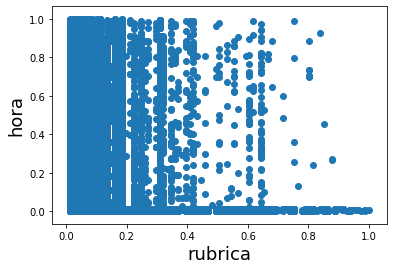

In [10]:
plt.scatter(xrm[:,0], xrm[:,1], cmap='gist_rainbow')
plt.xlabel('rubrica', fontsize=18)
plt.ylabel('hora', fontsize=18)

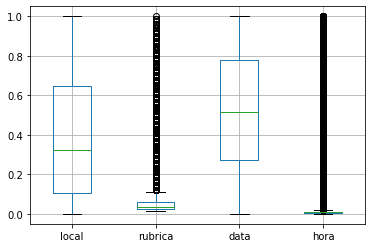

In [11]:
df.boxplot()

In [12]:
!pip install --user yellowbrick
from yellowbrick.cluster import KElbowVisualizer

In [13]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,20),timings=False)

In [14]:
elbow = df[['local','rubrica']]
elbow.head()

,local,rubrica
0,0.016661,0.024691
1,0.989292,0.074074
2,0.000040,0.061728
3,0.000008,0.061728
4,0.974348,0.061728


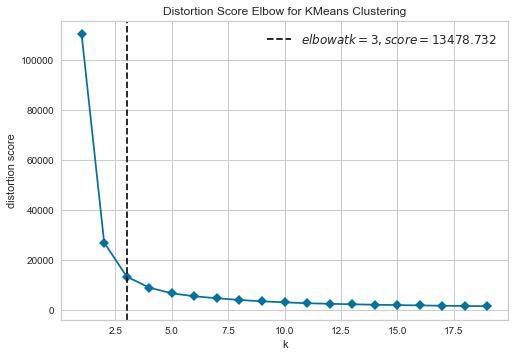

In [15]:
visualizer.fit(elbow) # Fit the data to the visualizer
visualizer.show() # Finalize and render the figure

# Criando Agrupamento

In [16]:
km = KMeans(n_clusters = visualizer.elbow_value_)
km.fit(xrm)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

## Comparando os resultados

In [17]:
new_labels = km.labels_
new_labels

array([0, 0, 0, ..., 0, 0, 2])

Text(0.5, 1.0, 'Com agrupamento')

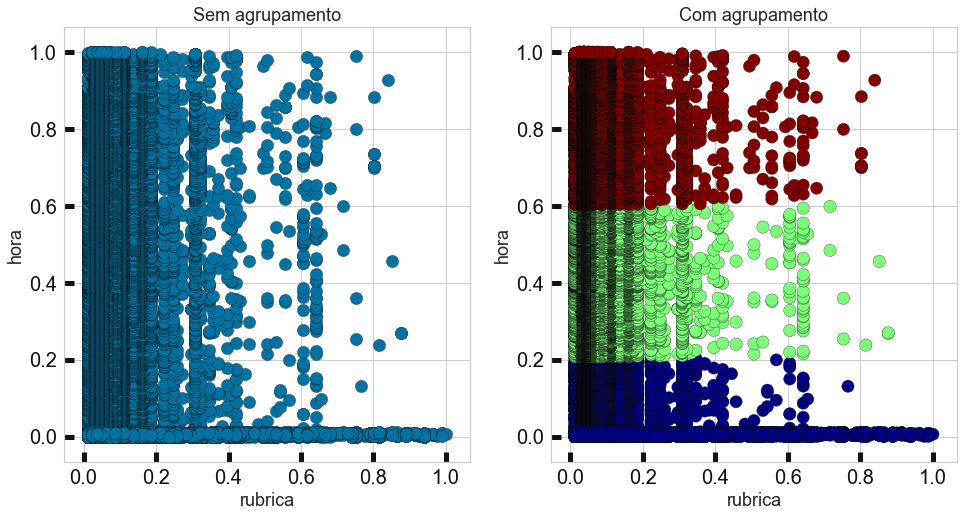

In [18]:
#7. Now, let’s compare our original data versus our clustered results using the following code.
# Plot the identified clusters and compare with the answers
fig, axes = plt.subplots(1, 2, figsize=(16,8))
axes[0].scatter(xrm[:, 0], xrm[:, 1], cmap='gist_rainbow',
edgecolor='k', s=150)
axes[1].scatter(xrm[:, 0], xrm[:, 1], c=new_labels, cmap='jet',
edgecolor='k', s=150)
axes[0].set_xlabel('rubrica', fontsize=18)
axes[0].set_ylabel('hora', fontsize=18)
axes[1].set_xlabel('rubrica', fontsize=18)
axes[1].set_ylabel('hora', fontsize=18)
axes[0].tick_params(direction='in', length=10, width=5, colors='k', labelsize=20)
axes[1].tick_params(direction='in', length=10, width=5, colors='k', labelsize=20)
axes[0].set_title('Sem agrupamento', fontsize=18)
axes[1].set_title('Com agrupamento', fontsize=18)

## Local x Hora

In [19]:
xrm = df.loc[:,["local","hora"]].values

Text(0, 0.5, 'hora')

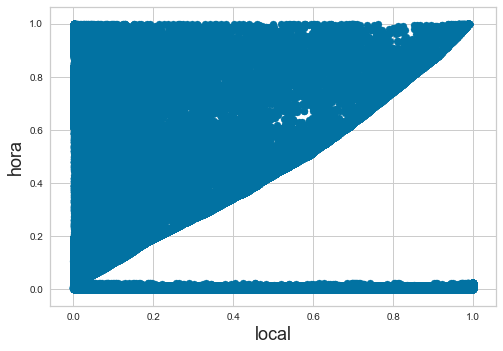

In [20]:
plt.scatter(xrm[:,0], xrm[:,1], cmap='gist_rainbow')
plt.xlabel('local', fontsize=18)
plt.ylabel('hora', fontsize=18)

In [21]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,20),timings=False)
elbow = df[['hora','local']]
elbow.head()

,hora,local
0,0.005665,0.016661
1,0.008525,0.989292
2,0.004845,0.000040
3,0.005535,0.000008
4,0.008755,0.974348


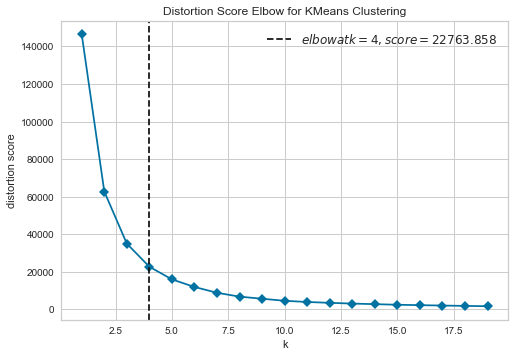

In [22]:
visualizer.fit(elbow) # Fit the data to the visualizer
visualizer.show() # Finalize and render the figure

In [23]:
km = KMeans(n_clusters = visualizer.elbow_value_ )
km.fit(xrm)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [24]:
new_labels = km.labels_
new_labels

array([0, 1, 0, ..., 1, 1, 2])

Text(0.5, 1.0, 'Com agrupamento')

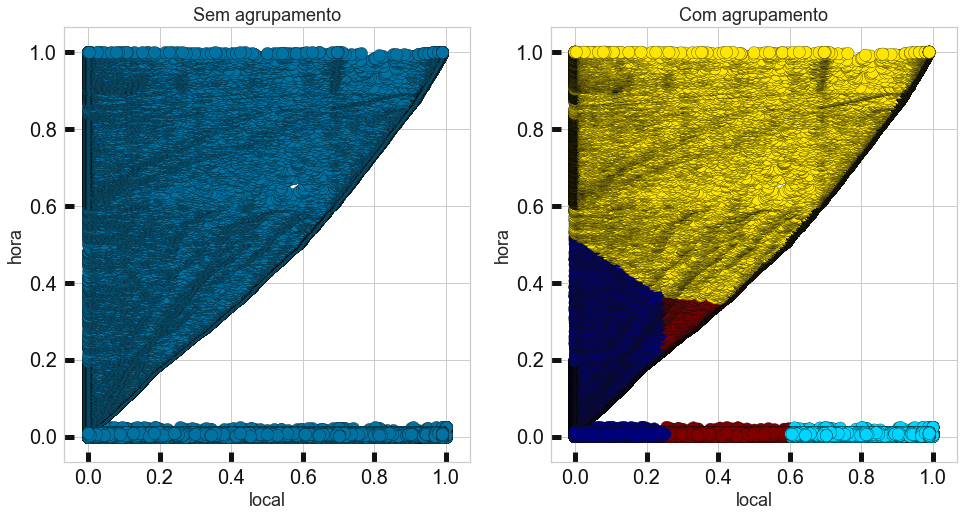

In [25]:
#7. Now, let’s compare our original data versus our clustered results using the following code.
# Plot the identified clusters and compare with the answers
fig, axes = plt.subplots(1, 2, figsize=(16,8))
axes[0].scatter(xrm[:, 0], xrm[:, 1], cmap='gist_rainbow',
edgecolor='k', s=150)
axes[1].scatter(xrm[:, 0], xrm[:, 1], c=new_labels, cmap='jet',
edgecolor='k', s=150)
axes[0].set_xlabel('local', fontsize=18)
axes[0].set_ylabel('hora', fontsize=18)
axes[1].set_xlabel('local', fontsize=18)
axes[1].set_ylabel('hora', fontsize=18)
axes[0].tick_params(direction='in', length=10, width=5, colors='k', labelsize=20)
axes[1].tick_params(direction='in', length=10, width=5, colors='k', labelsize=20)
axes[0].set_title('Sem agrupamento', fontsize=18)
axes[1].set_title('Com agrupamento', fontsize=18)

## Local x Data 

In [26]:
xrm = df.loc[:,["local","data"]].values

Text(0, 0.5, 'data')

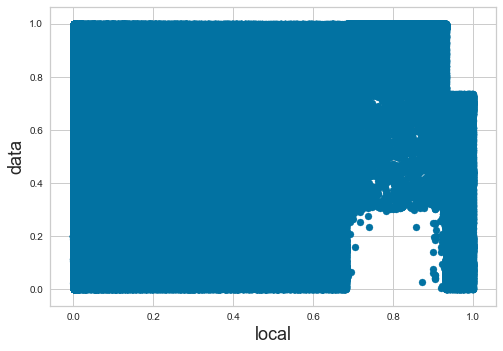

In [27]:
plt.scatter(xrm[:,0], xrm[:,1], cmap='gist_rainbow')
plt.xlabel('local', fontsize=18)
plt.ylabel('data', fontsize=18)

In [28]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,20),timings=False)
elbow = df[['local','data']]
elbow.head()

,local,data
0,0.016661,0.122654
1,0.989292,0.119973
2,0.000040,0.317694
3,0.000008,0.317024
4,0.974348,0.335791


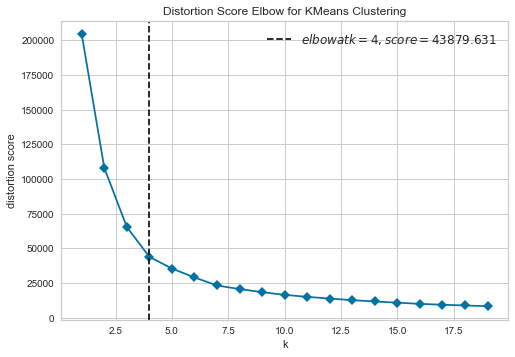

In [29]:
visualizer.fit(elbow) # Fit the data to the visualizer
visualizer.show() # Finalize and render the figure

In [30]:
km = KMeans(n_clusters = visualizer.elbow_value_)
km.fit(xrm)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [31]:
new_labels = km.labels_
new_labels

array([0, 1, 0, ..., 1, 1, 1])

Text(0.5, 1.0, 'Com agrupamento')

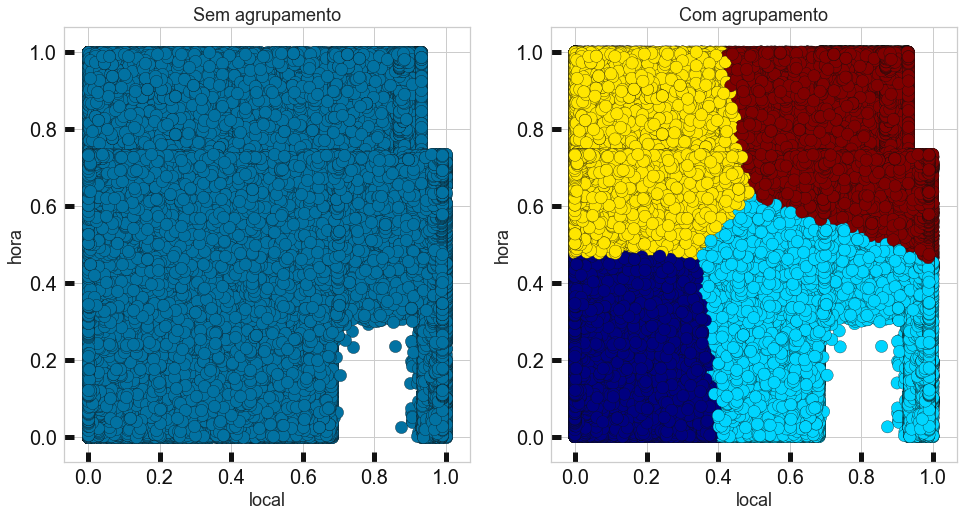

In [32]:
#7. Now, let’s compare our original data versus our clustered results using the following code.
# Plot the identified clusters and compare with the answers
fig, axes = plt.subplots(1, 2, figsize=(16,8))
axes[0].scatter(xrm[:, 0], xrm[:, 1], cmap='gist_rainbow',
edgecolor='k', s=150)
axes[1].scatter(xrm[:, 0], xrm[:, 1], c=new_labels, cmap='jet',
edgecolor='k', s=150)
axes[0].set_xlabel('local', fontsize=18)
axes[0].set_ylabel('hora', fontsize=18)
axes[1].set_xlabel('local', fontsize=18)
axes[1].set_ylabel('hora', fontsize=18)
axes[0].tick_params(direction='in', length=10, width=5, colors='k', labelsize=20)
axes[1].tick_params(direction='in', length=10, width=5, colors='k', labelsize=20)
axes[0].set_title('Sem agrupamento', fontsize=18)
axes[1].set_title('Com agrupamento', fontsize=18)

## Outra análise


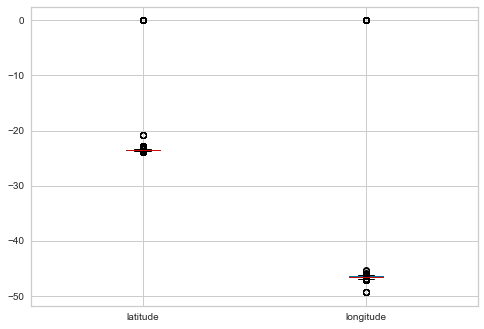

In [33]:
df = pd.read_sql_query("""select latitude,longitude from dim_local""",conn)
df = df.dropna(axis = 0, how = 'all')
df.boxplot()



In [34]:
xrm = df.loc[:,["latitude","longitude"]].values

Text(0, 0.5, 'longitude')

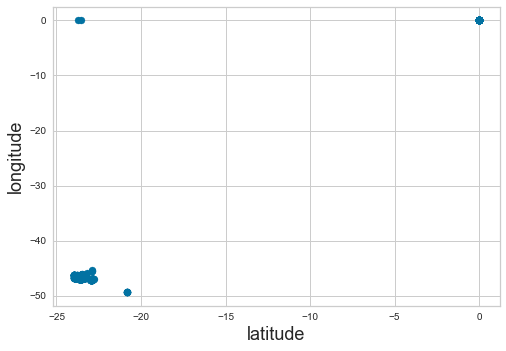

In [35]:
xrm = df.loc[:,["latitude","longitude"]].values
plt.scatter(xrm[:,0], xrm[:,1], cmap='gist_rainbow')
plt.xlabel('latitude', fontsize=18)
plt.ylabel('longitude', fontsize=18)

In [36]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,20),timings=False)
elbow = df[['latitude','longitude']]
elbow.head()

,latitude,longitude
1,-23.692815,-46.713132
2,-23.703064,-46.687906
3,-23.685841,-46.693421
4,-23.571559,-46.559656
5,0.000000,0.000000


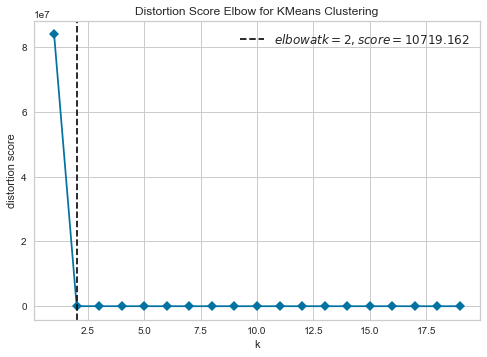

In [37]:
visualizer.fit(elbow) # Fit the data to the visualizer
visualizer.show() # Finalize and render the figure

In [38]:
km = KMeans(n_clusters = visualizer.elbow_value_)
km.fit(xrm)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [39]:
new_labels = km.labels_
new_labels

array([0, 0, 0, ..., 0, 0, 0])

Text(0.5, 1.0, 'Com agrupamento')

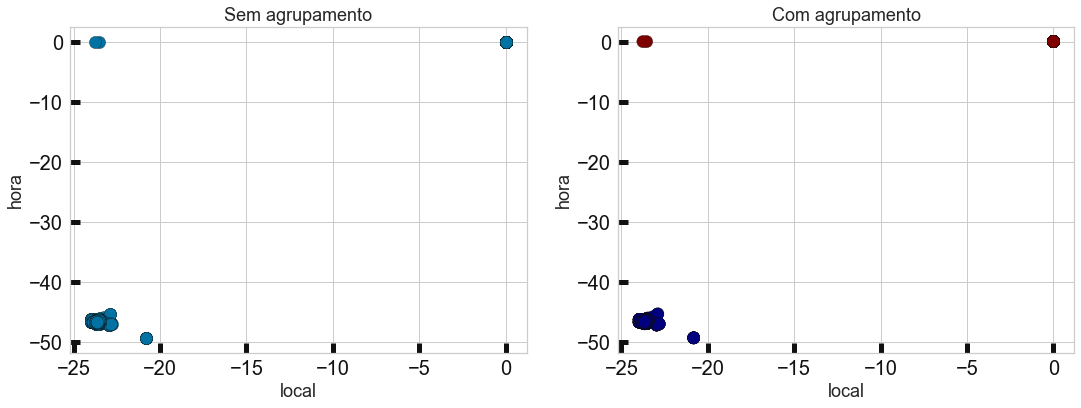

In [40]:
fig, axes = plt.subplots(1, 2, figsize=(18,6))
axes[0].scatter(xrm[:, 0], xrm[:, 1], cmap='gist_rainbow',
edgecolor='k', s=150)
axes[1].scatter(xrm[:, 0], xrm[:, 1], c=new_labels, cmap='jet',
edgecolor='k', s=150)
axes[0].set_xlabel('local', fontsize=18)
axes[0].set_ylabel('hora', fontsize=18)
axes[1].set_xlabel('local', fontsize=18)
axes[1].set_ylabel('hora', fontsize=18)
axes[0].tick_params(direction='in', length=10, width=5, colors='k', labelsize=20)
axes[1].tick_params(direction='in', length=10, width=5, colors='k', labelsize=20)
axes[0].set_title('Sem agrupamento', fontsize=18)
axes[1].set_title('Com agrupamento', fontsize=18)